In [2]:
import qiskit
from qiskit import *
qiskit.__qiskit_version__

import numpy as np
from qiskit.tools.visualization import plot_histogram, plot_state_city

import matplotlib as mpl

{'0100100': 20, '0101110': 1, '1111000': 14, '0101000': 26, '1111110': 12, '1010100': 27, '0011110': 4, '0010010': 12, '1011000': 178, '0011100': 5, '0100000': 19, '1101010': 34, '1010110': 105, '1011100': 44, '1111100': 16, '0011000': 6, '1011110': 57, '1100010': 19, '0010110': 6, '0011010': 18, '1100000': 28, '1110000': 15, '0000110': 7, '0010000': 13, '1011010': 48, '1100110': 15, '0000100': 17, '1100100': 45, '0001100': 6, '0101010': 17, '1110010': 12, '1110100': 20, '1110110': 9, '0000000': 6, '0010100': 17, '0001110': 6, '0101100': 7, '0100010': 3, '1101000': 7, '0000010': 15, '1101100': 19, '0001000': 11, '1111010': 10, '1101110': 8, '1010010': 3, '0001010': 10, '0100110': 3}


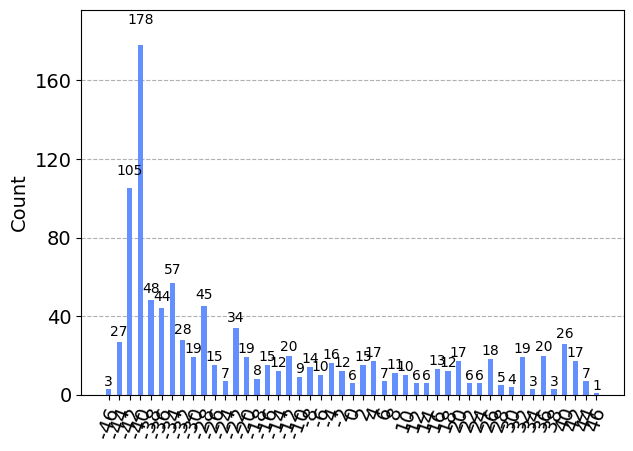

In [10]:
#Works for all n

#number of qubits representing walker state (2^n states)
#graph node numbers range: [-2^(n-1), +2^(n-1)-1]
n = 7

#number of iterations/walks to be performed
step = 60

#display all columns, False if too cluttered
showAll = False;

qnodes = QuantumRegister(n,'qc')
qsubnodes = QuantumRegister(1,'qanc')
csubnodes = ClassicalRegister(1,'canc')
cnodes = ClassicalRegister(n,'cr')

#clockwise rotation, adder circuit like
def increment_gate(qwc, q, subnode):
    #investigate whether increment can be done in a simpler way:
    #can use a adder circuit or will this mess with the algorithm?
    for i in range(len(q)):
        #multi-qubit tolfolli, target i, control by subnode & all bits of lesser significance
        target = q[i]
        qubits = q[i + 1 : len(q) + 1]
        qubits.insert(0, subnode)
        #qubits.append(target)
        #print(qubits)
        qwc.mct(qubits, target)
    qwc.barrier()
    return qwc

#counterclockwise rotation, subtractor circuit like
def decrement_gate(qwc, q, subnode):
    qwc.x(subnode)
    for i in range(1, len(q)):
        qwc.x(q[i])
    temp = q[1 : len(q) + 1]
    temp.insert(0, subnode)
    #temp.append(q[0])
    qwc.mct(temp, q[0])
    for i in range(1, len(q)):
        target = q[i]
        qubits = q[i + 1 : len(q) + 1]
        qubits.insert(0, subnode)
        #qubits.append(target)
        #print(qubits)
        qwc.x(target)
        qwc.mct(qubits, target)
    qwc.x(subnode)
    return qwc

def ibmsim(circ):
      sim = Aer.get_backend('aer_simulator')
      #sim = provider.get_backend("ionq.qpu")
      return execute(circ, sim, shots=1000).result().get_counts(circ)

def runQWC(qwc, times):
    for i in range(times):
        qwc.h(qsubnodes[0])
        #"coinflip" applied to the subnode every iteration
        increment_gate(qwc, qnodes, qsubnodes[0])
        decrement_gate(qwc, qnodes, qsubnodes[0])
    #why does result change if you measure at the end
    #does result do something to the qubits
    qwc.measure(qnodes, cnodes)
    return qwc

qwc = QuantumCircuit(qnodes, qsubnodes, cnodes, csubnodes)
qwc = runQWC(qwc, step)
result = ibmsim(qwc)

result2 = {}
for r in result:
    b = r.split( )[1]
    b = b[::-1]
    result2[b] = result[r]
print(result2)

newResult = {}
if (showAll):
    for i in range(-(2 ** (n - 1)), 2 ** (n - 1)):
        newResult[i] = 0

for r in result:
    b = r.split( )[1]
    b = b[::-1]
    dec = int(b, 2)
    if (b[0] == "1"):
        dec -= 2 ** len(b) 
    newResult[dec] = result[r]

plot_histogram(newResult)
#qwc.draw(output="mpl")

Cycle graph node numbers
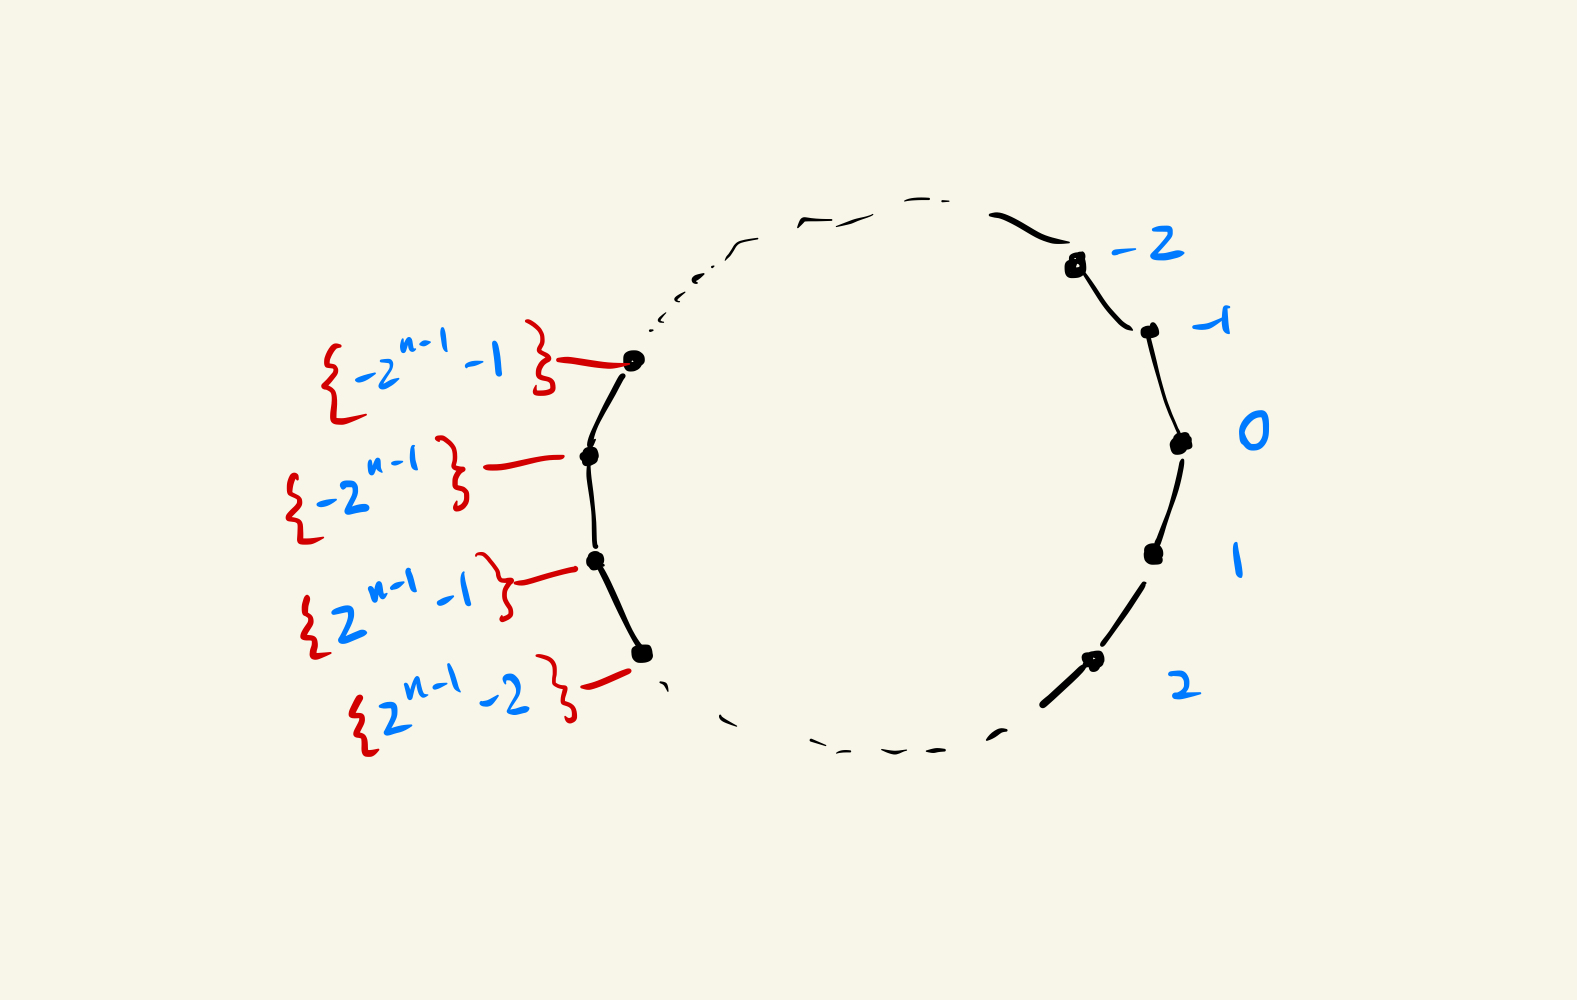

https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B1%2C1%2C1%2C%22H%22%5D%2C%5B%22~4kjc%22%5D%2C%5B%22~b34c%22%5D%2C%5B1%2C1%2C1%2C%22H%22%5D%2C%5B%22~4kjc%22%5D%2C%5B%22~b34c%22%5D%2C%5B1%2C1%2C1%2C%22H%22%5D%2C%5B%22~4kjc%22%5D%2C%5B%22~b34c%22%5D%2C%5B%22Measure%22%2C%22Measure%22%2C%22Measure%22%5D%5D%2C%22gates%22%3A%5B%7B%22id%22%3A%22~4kjc%22%2C%22name%22%3A%22Inc%22%2C%22circuit%22%3A%7B%22cols%22%3A%5B%5B%22X%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%5D%2C%5B1%2C%22X%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%5D%2C%5B1%2C1%2C%22X%22%2C%22%E2%80%A2%22%5D%5D%7D%7D%2C%7B%22id%22%3A%22~b34c%22%2C%22name%22%3A%22Dec%22%2C%22circuit%22%3A%7B%22cols%22%3A%5B%5B1%2C%22X%22%2C%22X%22%2C%22X%22%5D%2C%5B%22X%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%5D%2C%5B1%2C%22X%22%5D%2C%5B1%2C%22X%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%5D%2C%5B1%2C1%2C%22X%22%5D%2C%5B1%2C1%2C%22X%22%2C%22%E2%80%A2%22%5D%2C%5B1%2C1%2C1%2C%22X%22%5D%5D%7D%7D%5D%7D